## Install and import Dependencies

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [3]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install ISR --no-deps

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-contrib-python==4.5.5.62

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import time
import uuid
from PIL import Image
import torchvision
import torchvision.transforms.functional as F
import torchvision.transforms as T

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## Model Preparation & License Plate Segmentation

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [12]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\broth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-29 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [27]:
# %matplotlib inline 
# plt.imshow(np.squeeze(result.render()))
# plt.show()

In [28]:
# !cd yolov5 && python train.py --img 640 --batch 32 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [29]:
# !cd yolov5 && python train.py --img 640 --batch 12 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [13]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp22/weights/last.pt')

Using cache found in C:\Users\broth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-29 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [52]:
#image = cv2.imread('G:/CSE_498r/project/g_MG_0806.JPG')
image = cv2.imread('4.png')

In [53]:
result = model01(image)
result.print()

image 1/1: 820x957 1 license-plate
Speed: 4.9ms pre-process, 287.2ms inference, 3.0ms NMS per image at shape (1, 3, 576, 640)


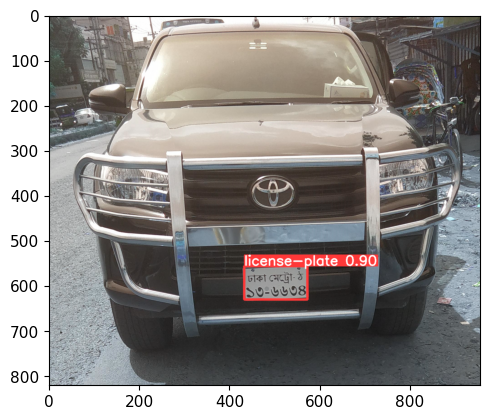

In [54]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [55]:
result.pandas().xyxy[0]

xmin        ymin        xmax        ymax  confidence  class  \
0  432.66507  556.565491  572.312256  630.222412    0.904474      0   

            name  
0  license-plate

In [56]:
location = result.xyxy[0][0]
location_arr = []

In [57]:
for bound in location:
    location_arr.append(int(bound.item()))

In [58]:
location_arr

[432, 556, 572, 630, 0, 0]

In [59]:
location_arr = location_arr[:4]

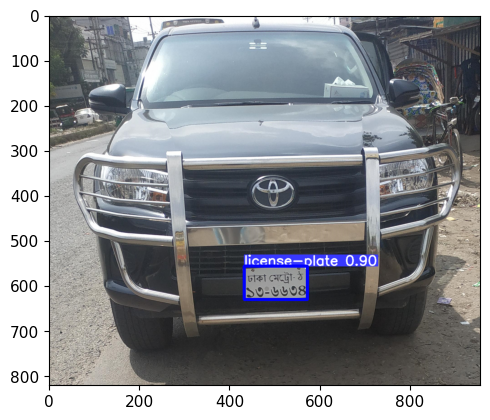

In [60]:
ncopy_img  = image.copy()
cv2.rectangle(ncopy_img, (location_arr[0], location_arr[1]), (location_arr[2], location_arr[3]), (255,0,0), 5)

%matplotlib inline 

plt.imshow(cv2.cvtColor(ncopy_img, cv2.COLOR_BGR2RGB))


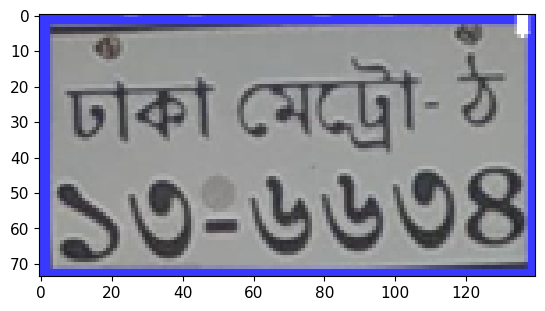

In [61]:
cropped_image  = image[location_arr[1]:location_arr[3], location_arr[0]:location_arr[2]]

%matplotlib inline 

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



## Image Upscaling using ISR

1/1 [==============================] - 1s 747ms/step


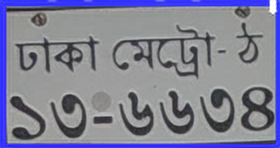

In [62]:
#Image upscaling using ISR


from ISR.models import RDN

img = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2BGR)
lr_img = np.array(img)

rdn = RDN(weights='psnr-small')
sr_img = rdn.predict(lr_img)
Image.fromarray(sr_img)

## Image Sharpening Process

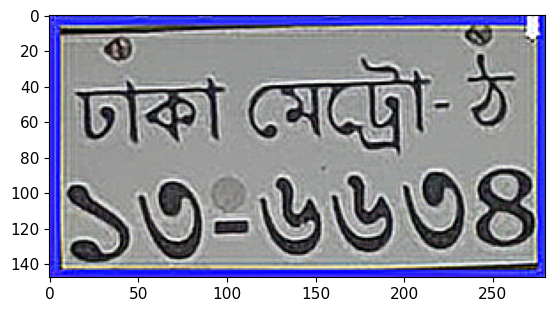

In [71]:
# sharp process 3 using PIL and Tensorflow sharpening 

img_pil = T.ToPILImage()(sr_img)
sharp_pil = F.adjust_sharpness(img_pil, 7.0) #tweak this
sharp_img = cv2.cvtColor(np.array(sharp_pil), cv2.COLOR_RGB2BGR)
plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB))

NameError: name 'filename' is not defined

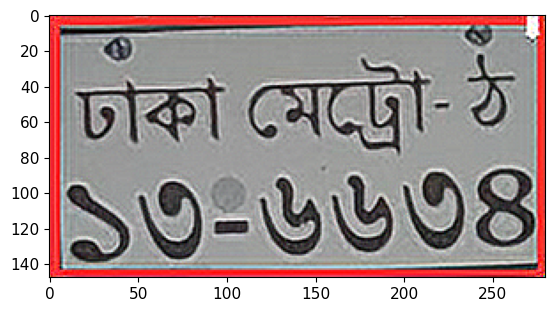

In [66]:
# sharp process 4

sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharped_img = cv2.filter2D(sr_img, -1, sharpen_filter)
plt.imshow(cv2.cvtColor(sharped_img, cv2.COLOR_BGR2RGB))
cv2.imwrite(filename, sharped_img)

## Adaptive Thresholding

NameError: name 'filename' is not defined

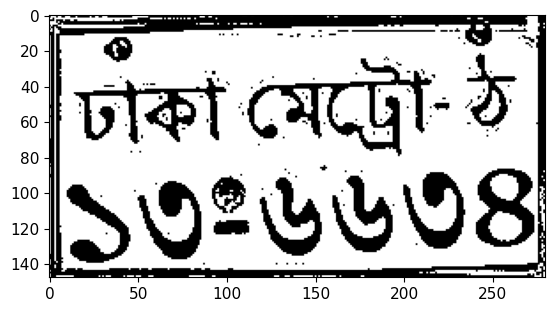

In [67]:
# using adaptive threshold (not good enough)

cropped = cv2.cvtColor(sharped_img, cv2.COLOR_BGR2GRAY)
adaptive = cv2.adaptiveThreshold(cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 81,5)
plt.imshow(cv2.cvtColor(adaptive, cv2.COLOR_BGR2RGB))
cv2.imwrite(filename, adaptive)

## EasyOCR

In [30]:
reader = easyocr.Reader(['bn'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [68]:
#EASYocr
#result = reader.readtext(cropped_img)
result = reader.readtext(sharp_img, detail=1, paragraph=True) #change img variable from here
print(result)

[[[[2, 11], [280, 11], [280, 148], [2, 148]], 'ঢাকা মেট্রো-ঠ ১৩-৬৬৩৪']]
